<a href="https://colab.research.google.com/github/sujitojha1/EVA4/blob/rev4/S11/EVA4_S11_Solution_cyclic_learning_rate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem Statement EVA 4, Session11 : Cyclic Learning Rate Plot

**Target**: 


*  Write a code that draws this curve (without the arrows). In submission, you'll upload your drawn curve and code for that
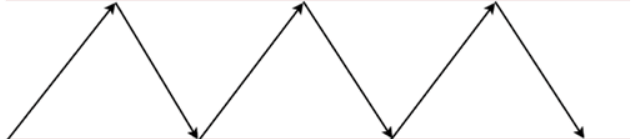

In [6]:
import math
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# Cifar Configurations
min_lr = 0.1
max_lr = 0.8

batchsize = 512
training_size = 50000

In [7]:
def cyclical_lr(stepsize, min_lr=3e-4, max_lr=3e-3):

    # Scaler: we can adapt this if we do not want the triangular CLR
    scaler = lambda x: 1.

    # Lambda function to calculate the LR
    lr_lambda = lambda it: min_lr + (max_lr - min_lr) * relative(it, stepsize)

    # Additional function to see where on the cycle we are
    def relative(it, stepsize):
        cycle = math.floor(1 + it / (2 * stepsize))
        x = abs(it / stepsize - 2 * cycle + 1)
        return max(0, (1 - x)) * scaler(cycle)

    return lr_lambda

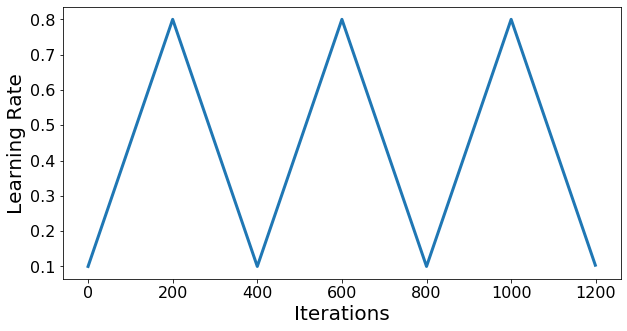

In [8]:
stepsize = 200
fig, axs = plt.subplots(1,1,figsize=(10,5))
plt.plot([cyclical_lr(stepsize,min_lr=min_lr,max_lr=max_lr)(i) for i in range(1200)],linewidth=3)
plt.xlabel('Iterations',fontsize=20)
plt.ylabel('Learning Rate',fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()